# Sensor_optimization_with_DeepLearning(K-means)
- 스마트 해상물류 23조 carry_on 센서 최적화 알고리즘 개발
- author: 김성현(상명대학교 휴먼지능정보공학전공 3학년)
- 환경: google colab
- useage: main purpose인 선박의 컨테이너 유실 위험성 감지 알고리즘 개발에 활용할 수 있음.

### 센서 최적화 알고리즘 development code
- 센서 최적화 대상으로 삼기 위해
- 실제 2019년 컨테이너 유실사고가 발생했던 One Apus 호를 알고리즘 배경으로 선택하여 해당 선박의 컨테이너 적재 용량에 따른 센서 최적화 진행.  
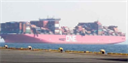

#### 1. 선박 컨테이너 적재 공간 3D 가상좌표 준비
- case 1: 20 x 20 x 7 = 2800개의 컨테이너 적재 공간 3차원 좌표화

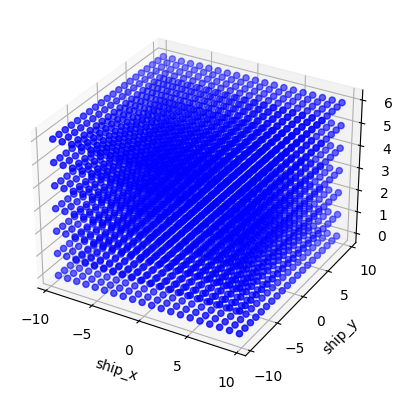

In [9]:
# 필요 라이브러리 import 및 임의의(가상의) 선박 컨테이너 적재 모델 매핑

# 3차원 산포도
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 좌표의 크기 지정
x_size, y_size, z_size = 20, 20, 7

# 각 차원의 크기 계산
x_interval = y_interval = z_interval = 1

# 컨테이너 적재의 가장 밑에 있는 단의 중심을 원점으로 삼기 위한 오프셋 계산
x_offset = (x_size - 1) / 2
y_offset = (y_size - 1) / 2
z_offset = 0  # 컨테이너선의 가장 밑에 있는 단의 중심이므로 z 축 오프셋은 0입니다.

# 3차원 좌표 생성
x_coords = np.linspace(-x_offset, x_offset, x_size)
y_coords = np.linspace(-y_offset, y_offset, y_size)
z_coords = np.linspace(z_offset, z_size - 1, z_size)

# 3차원 좌표 그리드 생성
x_mesh, y_mesh, z_mesh = np.meshgrid(x_coords, y_coords, z_coords)

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D 그래프에 좌표를 플롯
ax.scatter(x_mesh, y_mesh, z_mesh, c='b', marker='o')

# 각 축의 레이블 설정
ax.set_xlabel('ship_x')
ax.set_ylabel('ship_y')
ax.set_zlabel('ship_z')

# 그래프 출력
plt.show()

#### 2. 선박에 경사를 주어 일정 기울기 θ 를 주었다고 가정.

#### 3. θ 에 따른 각 좌표값(컨테이너)들의 회전 운동을 하는 거리를 원 부채꼴 공식을 통해 계산

In [7]:
# 기울기 (10도를 라디안으로 변환)
angle_degrees = 10
angle_radians = np.radians(angle_degrees)

# 부채꼴의 호의 길이를 계산
chord_length = 2 * distance_to_origin * np.sin(angle_radians / 2)

print(chord_length)
print(len(chord_length))

[2.34187984 2.34835808 2.36768645 ... 2.44347152 2.49880242 2.56480856]
2800


#### 4. 어떤 군집이 가장 큰 군집 평균을 가지고 있는가?

#### 5. 해당 군집에 속한 좌표값들이 가장 운동량 변화가 큰 곳을 최적해로 선정

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


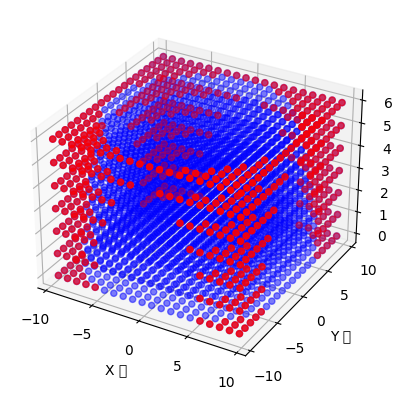

선택한 군집 내 요소의 갯수: 568


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# K-means 군집화
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(chord_length.reshape(-1, 1))

# 각 데이터 포인트가 어느 군집에 속하는지 확인
labels = kmeans.labels_

# 군집 별 중심값
cluster_centers = kmeans.cluster_centers_

# 군집 평균을 계산하여 가장 큰 군집 선택
largest_cluster_idx = np.argmax(cluster_centers)

# 선택한 군집 내 요소들의 인덱스 가져오기
largest_cluster_indices = np.where(labels == largest_cluster_idx)[0]

# 선택한 군집 내 요소들의 갯수
largest_cluster_size = len(largest_cluster_indices)

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 모든 좌표 플롯
ax.scatter(x_mesh.flatten(), y_mesh.flatten(), z_mesh.flatten(), c='b', marker='o', alpha=0.5)

# 선택한 군집 내 요소들만 다른 색상으로 표시
ax.scatter(x_mesh.flatten()[largest_cluster_indices], y_mesh.flatten()[largest_cluster_indices],
           z_mesh.flatten()[largest_cluster_indices], c='r', marker='o')

# 각 축의 레이블 설정
ax.set_xlabel('X 축')
ax.set_ylabel('Y 축')
ax.set_zlabel('Z 축')

# 그래프 출력
plt.show()

# 선택한 군집 내 요소들의 갯수 출력
print("선택한 군집 내 요소의 갯수:", largest_cluster_size)

#### additional: container의 z축 layer별 최적화 갯수 비교
##### 위 알고리즘을 이용해 아래 각각의 case들의 최적화 시 갯수는 다음과 같음.

- case 1: 20 x 20 x 6 = 2400개 ==> 520개 요소로 최적화
- case 2: 20 x 20 x 7 = 2800개 ==> 568개 요소로 최적화
- case 3: 20 x 20 x 8 = 3200개 ==> 708개 요소로 최적화
- case 4: 20 x 20 x 9 = 3600개 ==> 824개 요소로 최적화

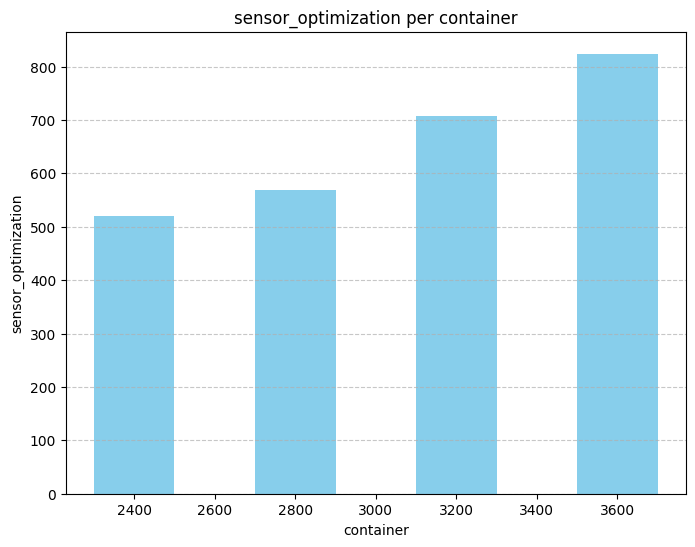

In [10]:
# 위 case별 최적화 개수의 도식화
import matplotlib.pyplot as plt

# 컨테이너 갯수와 센서 최적화 갯수
container_counts = [2400, 2800, 3200, 3600]
sensor_counts = [520, 568, 708, 824]

# 그래프 생성
plt.figure(figsize=(8, 6))
plt.bar(container_counts, sensor_counts, color='skyblue', width=200, align='center')

# X, Y 축 레이블 및 타이틀 설정
plt.xlabel('container')
plt.ylabel('sensor_optimization')
plt.title('sensor_optimization per container')

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()